In [14]:
# code for loading the format for the notebook
import os

# path : store the current path to convert back to it later
path = os.getcwd()
os.chdir('../notebook_format')
from formats import load_style
load_style()

In [15]:
os.chdir(path)
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Deep Learning Basics

## Gradient Descent

Our objective in training a neural network is to find a set of weights that gives us the lowest error when we run it against our training data. There're many ways to find these weights and simplest one is so called **gradient descent**. It does this by giving us directions (using derivatives) on how to "shift" our weights to an optimum. It tells us whether we should increase or decrease the value of a specific weight in order to lower the error function.

Let's imagine we have a function $f(x) = x^4 - 3x^3 + 2$ and we want to find the minimum of this function using gradient descent. Here's a graph of that function:

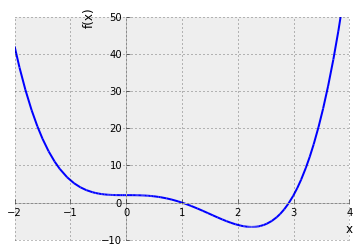

In [4]:
from sympy.plotting import plot
from sympy import symbols, init_printing

# plotting f(x) = x^4 - 3x^3 + 2, showing -2 < x <4
init_printing()
x = symbols('x')
fx = x**4 - 3 * x ** 3 + 2
p1 = plot( fx, ( x, -2, 4 ), ylim = ( -10, 50 ) ) 

As you can see, there appears to be a minimum around ~2.3 or so. Gradient descent answers this question: If we were to start with a random value of x, which direction should we go if we want to get to the lowest point on this function? Let's imagine we pick a random x value, say <b>x = 4</b>, which would be somewhere way up on the right side of the graph. We obviously need to start going to the left if we want to get to the bottom. This is obvious when the function is an easily visualizable 2d plot, but when dealing with functions of multiple variables, we need to rely on the raw mathematics.

Calculus tells us that the derivative of a function at a particular point is the rate of change/slope of the tangent to that part of the function. So let's use derivatives to help us get to the bottom of this function. The derivative of $f(x) = x^4 - 3x^3 + 2$ is $f'(x) = 4x^3 - 9x^2$. So if we plug in our random point from above (x=4) into the first derivative of $f(x)$ we get $f'(4) = 4(4)^3 - 9(4)^2 = 112$. So how does 112 tell us where to go? Well, first of all, it's positive. If we were to compute $f'(-1)$ we get a negative number (-13). So it looks like we can say that whenever the $f'(x)$ for a particular $x$ is positive, we should move to the left (decrease x) and whenever it's negative, we should move to the right (increase x).

We'll now formalize this: When we start with a random x and compute it's deriative $f'(x)$, our <b>new x</b> should then be proportional to $x - f'(x)$. The word proportional is there because we wish to control <em>to what degree</em> we move at each step, for example when we compute $f'(4)=112$, do we really want our new $x$ to be $x - 112 = -108$? No, if we jump all the way to -108, we're even farther from the minimum than we were before. Instead, we want to take relatively <em>small</em> steps toward the minimum. 

Let's say that for any random $x$, we want to take a step (change $x$ a little bit) such that our <b>new $x$</b> $ = x - \alpha*f'(x)$. We'll call $\alpha$ (alpha) our <em>learning rate or step size</em> because it determines how big of a step we take. $\alpha$ is something we will just have to play around with to find a good value. Some functions might require bigger steps, others smaller steps.

Suppose we've set our $\alpha$ to be 0.001. This means, if we randomly started at $f'(4)=112$ then our new $x$ will be $ = 4 - (0.001 * 112) = 3.888$. So we moved to the left a little bit, toward the optimum. Let's do it again. $x_{new} = x - \alpha*f'(3.888) = 3.888 - (0.001 * 99.0436) = 3.79$. Nice, we're indeed moving to the left, closer to the minimum of $f(x)$, little by little. And we'll keep on doing this until we've reached convergence. By convergence, we mean that if the absolute value of the difference between the updated $x$ and the old $x$ is smaller than some randomly small number that we set, denoted as $\epsilon$ (epsilon).

In [6]:
x_old = 0
x_new = 4 # The algorithm starts at x = 4
alpha = 0.01 # step size
epsilon = 0.00001

def f_derivative(x):
    return 4 * x ** 3 - 9 * x ** 2

while abs(x_new - x_old) > epsilon:
    x_old = x_new
    x_new = x_old - alpha * f_derivative(x_old)

print("Local minimum occurs at", x_new)

Local minimum occurs at 2.2500325268933734


The script above says that if the absolute difference of $x$ between the two iterations is not changing by more than 0.00001, then we're probably at the bottom of the "bowl" because our slope is approaching 0, and therefore we should stop and call it a day. Now, if you remember some calculus and algebra, you could have solved for this minimum analytically, and you should get 2.25. Very close to what our gradient descent algorithm above found.

## More Gradient Descent...

As you might imagine, when we use gradient descent for a neural network, things get a lot more complicated. Not because gradient descent gets more complicated, it still ends up just being a matter of taking small steps downhill, it's that we need that pesky derivative in order to use gradient descent, and the derivative of a neural network cost function (with respect to its weights) is pretty intense. It's not a matter of just analytically solving $f(x)=x^2, f'(x)=2x$ , because the output of a neural net has many nested or "inner" functions, if you will. That's why someone discovered backpropagation. Backpropagation is simply a method of finding the derivative of the neural net's cost function (with respect to its weights) without having to do crazy math.

Also unlike our toy math problem above, a neural network may have many weights. We need to find the optimal value for each individual weight to lower the cost for our entire neural net output. This requires taking the partial derivative of the cost/error function with respect to a single weight, and then running gradient descent for each individual weight. Thus, for any individual weight $W_j$, we'll compute the following:

$$ W_j^{(t + 1)} = W_j^{(t)} - \alpha * \frac{\partial C}{\partial W_j}$$ 

Where:

- $C$ denotes the cost.
- $W_j^{(t)}$ denotes the weight of the $j_{th}$ feature at iteration $t$.

And as before, we do this iteratively for each weight, many times, until the whole network's cost function is minimized.

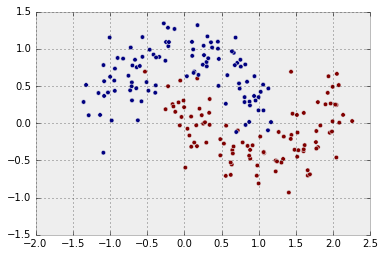

In [8]:
import sklearn.datasets
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)

plt.scatter( X[ :, 0 ], X[ :, 1 ], c = y )
plt.show()

In [21]:
data_num = X.shape[0] # training set size
feature_num = X.shape[1] # input layer dimensionality
class_num = np.unique(y).shape[0] # output layer dimensionality
hidden_num = 3

In [39]:
def _one_hot_encode( y, class_num ):
    y_encode = np.zeros( ( y.shape[0], class_num ) )
    for idx, val in enumerate(y):
        y_encode[ idx, val ] = 1.0

    return y_encode

In [40]:
y_encode = _one_hot_encode( y, class_num )
y_encode

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,

In [30]:
np.random.seed(0)
w1 = np.random.randn( feature_num, hidden_num )
b1 = np.zeros(hidden_num)
w2 = np.random.randn( hidden_num, class_num )
b2 = np.zeros(( 1, class_num ))

In [43]:
# feed-forward for 1-hidden layer
z1 = X.dot(w1) + b1
a1 = np.tanh(z1) # tanh activation
z2 = a1.dot(w2) + b2
softm = np.exp(z2) / np.sum( np.exp(z2), axis = 1, keepdims = True )

delta3 = softm - y_encode

In [44]:
delta3

array([[-0.42330643,  0.42330643],
       [ 0.49048082, -0.49048082],
       [ 0.64941206, -0.64941206],
       [-0.4739674 ,  0.4739674 ],
       [ 0.42792206, -0.42792206],
       [ 0.3957751 , -0.3957751 ],
       [-0.49560969,  0.49560969],
       [ 0.40508323, -0.40508323],
       [-0.46597297,  0.46597297],
       [ 0.43706294, -0.43706294],
       [-0.25782052,  0.25782052],
       [ 0.31297723, -0.31297723],
       [ 0.43933051, -0.43933051],
       [ 0.43374213, -0.43374213],
       [-0.21776041,  0.21776041],
       [-0.53004302,  0.53004302],
       [-0.27812576,  0.27812576],
       [ 0.34513514, -0.34513514],
       [-0.22532299,  0.22532299],
       [-0.17851894,  0.17851894],
       [ 0.37286476, -0.37286476],
       [ 0.41572321, -0.41572321],
       [-0.20932355,  0.20932355],
       [ 0.44254681, -0.44254681],
       [-0.14979571,  0.14979571],
       [ 0.62319837, -0.62319837],
       [ 0.39183217, -0.39183217],
       [ 0.38997876, -0.38997876],
       [ 0.55363843,


Let's do backpropagation and gradient descent on the simplest possible neural network (in fact, it's hardly a network), a single input, a single output, no bias units. We want our NN to model this problem:

|    X | Y  
|------|----
|  0.1 | 0  
|  0.25| 0
|  0.5 | 0
|  0.75| 0
|  1.0 | 0

That is, our network is simply going to return 0 for any input $x$ between 0 and 1 (not including 0 itself. That's as simple as it gets. Here's a diagram of our network:

![Simplest NN](images/SimpleNeuralNet.png "Simplest Neural Net")

Where f is the activation function, namely the sigmoid function (note that there're other kinds of activation functions) and $$sigmoid = \frac{1}{(1+e^{-z})}$$

A quick recap with the sigmoid function and it's shape, it squashes any input $x \in \Bbb R$ (any input, $x$ in the real numbers), between $0-1$
![](images/sigmoid.gif)
Clearly, we just need $W_1$ to be a big negative number, so that any $x$ will become a big negative number, and our $sigmoid$ function will return something close to 0.

Just a quick review of partial derivatives, say we have a function of two variables, $f(x,y) = 2x^2 + y^3$, then the partial derivative of $f(x,y)$ with respect to $x$, $\frac{\partial f}{\partial x} = 4x$ and $\frac{\partial f}{\partial y} = 3y^2$. Thus, we just pretend like $y$ is a constant (and it disappears like in ordinary differentiation) when we partially differentiate with respect to $x$ (and vice versa for $y$)

Now let's define our <b>cost</b> (or error) <b>function</b>. A commonly used cost function is the Mean Squared Error (MSE), which is denoted as:

$$C = \frac{1}{2m}\sum_{i=1}^m{(h(x_i) - y)^2}$$
 
$h(x)$ is whatever our output function is (in our case the neural net's sigmoid). This says, that for every $x$: ${x_1, x_2, x_3 ... x_m}$ and therefore every $h(x_i)$, we substract $y$ which is the expected or ideal value, square it, and then add them all up, at the end multiply the sum by $\frac 1{2m}$, where $m$ is the number of training examples.
<p>
Let's assume we built this neural net, and without training it all, just with a random initial weight $W_1 = 0.3$, it outputs $h(0.1) = 0.51$ and $h(0.25) \approx 0.52$. Let's compute the error/cost with our function defined above for just the first two training examples to keep it simple.
</p><p>
$$m = 2$$
$$h(x) = \frac{1}{(1+e^{-0.3*x_m})}$$
$$ C(W_j) = \frac{1}{2m}\sum_1^m{(h(x) - y)^2} $$
$$ C(0.3) = \frac{1}{2m}\sum_1^m{(h(x) - y)^2} = \frac{1}{4}(0.51 - 0)^2 + \frac{1}{4}(0.52 - 0)^2 = \mathbf{0.133}$$
</p>

Let’s say you want to predict some output value y, given some input value X. For example, maybe you want to predict your score on a test based on how many hours you sleep and how many hours you study the night before. To use a machine learning approach, we first need some data. Let’s say for the last three tests, you recorded your number of hours of studying, your number of hours sleeping, and your score on the test.

Now that we have some data, we’re going to use it to train a model to predict how you will do on your next test, based on how many hours you sleep and how many hours you study. This is called a supervised regression problem. It’s supervised because our examples have inputs and outputs. It’s a regression problem because we’re predicting your test score, which is a continuous output. If we we’re predicting your letter grade, this would be called a classification problem, and not a regression problem.

There are an overwhelming number of models within machine learning, here we’re going to use a particularly interesting one called an artificial neural network. These guys are loosely based on how the neurons in your brain work, and have been particularly successful recently at solving really big, really hard problems (e.g. image recognition). 

Before we throw our data into the model, we need to account for the differences in the units of our data. Both of our inputs are in hours, but our output is a test score, scaled between 0 and 100. Neural networks are smart, but not smart enough to guess the units of our data. It’s kind of like asking our model to compare apples to oranges, where most learning models really only want to compare apples to apples. The solution is to scale our data, this way our model only sees standardized units. Here, we're going to take advantage of the fact that all of our data is positive, and simply divide by the maximum value for each variable, effectively scaling the result between 0 and 1. 

In [13]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array( ( [ 3, 5], [ 5, 1 ], [ 10, 2 ] ) )
y = np.array( ( [75], [82], [93] ) )
X = X / np.amax( X, axis = 0 )
y = y / 100 # max test score is 100

print(X)
print()
print(y)

[[ 0.3  1. ]
 [ 0.5  0.2]
 [ 1.   0.4]]

[[ 0.75]
 [ 0.82]
 [ 0.93]]


Now we can build our Neural Net. We know our network must have 2 inputs and 1 output, because these are the dimensions of our data. We’ll call our output y hat, because it’s an estimate of y, but not the same as y. Any layer between our input and output layer is called a hidden layer. Recently, researchers have built networks with many many hidden layers. These are known as a deep belief networks, giving rise to the term deep learning. Here, we’re going to use 1 hidden layer with 3 hidden units, but if we wanted to build a deep neural network, we would just stack a bunch of layers together.

<img src='images/simpleNetwork.png' width=600, height=800>

Our network has 2 inputs, 3 hidden units, and 1 output (the circles are also known as neurons or nodes). These are examples of hyperparameters. Hyperparameters are constants that establish the structure and behavior of a neural network, but are not updated as we train the network. Our learning algorithm is not capable of, for example, deciding that it needs another hidden unit, this is something that WE must decide on before training. What a neural network does learn are parameters, specifically the weights on the synapses (lines that connects the nodes). Here we'll formally denote some notations:

<h3 align = 'center'> Variables </h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row in an example| (numExamples, input_size)|
|y |$$y$$|target data|(numExamples, output_size)|
|W1 | $$W^{(1)}$$ | Layer 1 weights | (input_size, hidden_size) |
|W2 | $$W^{(2)}$$ | Layer 2 weights | (hidden_size, output_size) |
|z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hidden_size) |
|a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hidden_size) |
|z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, output_size) |

Each input value, or element in matrix $X$, needs to be multiplied by a corresponding weight and then added together with all the other results for each neuron. Which lead us to our first official formula:

$$ z^{(2)} = XW^{(1)} $$

Now that we have the activities for our second layer, $z^{(2)}$, we need to apply the activation function to each entry in matrix $z$. Here we'll use the sigmoid function as our activation function (there're many other kinds). We now have our second formula for forward propogation:
 
$$a^{(2)} = f(z^{(2)})$$

Where $f$ denotes our activation function.

To finish forward propogation we need to propogate a two all the way to the output, $\hat{y}$. We've already done the heavy lifting in the previous layer, so all we have to do now is multiply $a^{(2)}$ by our senond layer wieghts $W^{(2)}$ and apply one more activation funcion and last but not least, we'll apply our activation function to $z^{(3)}$ yeilding our official estimate of your test score, $\hat{y}$.  

$$z^{(3)} = a^{(2)}W^{(2)}$$

$$\hat{y} = f(z^{(3)})$$

In [14]:
class NeuralNet(object):
    def __init__(self):        
        self.input_size = 2
        self.hidden_size = 3
        self.output_size = 1
        
        
        # weights (parameters), initialize them as random
        self.W1 = np.random.randn( self.input_size, self.hidden_size )
        self.W2 = np.random.randn( self.hidden_size, self.output_size )
        
    def forward( self, X ):
        self.z2 = np.dot( X, self.W1 )
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot( self.a2, self.W2 )
        y_hat = self.sigmoid(self.z3) 
        return y_hat
        
    def sigmoid( self, z ):
        return 1 / ( 1 + np.exp(-z) )

In [15]:
nn = NeuralNet()
y_hat = nn.forward(X)
print(y_hat)
print(y)

[[ 0.45841714]
 [ 0.48901087]
 [ 0.48974758]]
[[ 0.75]
 [ 0.82]
 [ 0.93]]


This simple code is now capable of estimating your test score given how many hours you sleep and how many hours you study. We can pass in our input data and get real outputs. Now, you may be noticing that our estimates are quite terrible. That's because we have not yet trained our network, that's what we'll work on next.

To improve our model, we first need to quantify exactly how wrong our predictions are. We'll do this with a cost function. A cost function allows us to express exactly how wrong or "costly" our models is, given our examples. One way to compute an overall cost is to take each error value, square it, and sum these values together. 

$$J = \sum \frac{1}{2}(y-\hat{y})^2$$

Multiplying by one half will make things simpler down the road. Now that we have a cost, or job is to minimize it. When someone says they’re training a network, what they really mean is that they're minimizing a cost function by changing the weights.

## Reference 

- [A Beginner's Guide to Deep Learning - PyCon 2016](https://www.youtube.com/watch?v=kVud83kqv30)

- [Neural Networks Demystified](https://www.youtube.com/watch?v=5MXp9UUkSmc)

- [Gradient Descent with Backpropagation](http://outlace.com/Beginner-Tutorial-Backpropagation/)

- [A Step by Step Backpropagation Example](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)

- [Implementing a Neural Network From Scratch](http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/)

- [Calculus on Computational Graphs: Backpropagation](http://colah.github.io/posts/2015-08-Backprop/)